## Travelling Salesman Problem

## Importo librerias

In [28]:
import pandas as pd
import numpy as np
import requests
import math
from collections import namedtuple
import random
import matplotlib.pyplot as plt


## Descargo archivo de coordenadas X y Y de los puntos de visita

In [31]:
# Descarga el archivo de coordenadas y lo guarda localmente

def download_file(url, local_filename):
    with requests.get(url, stream=True) as response:
        response.raise_for_status()  # Lanza un error si la solicitud falla
        with open(local_filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)

# URL del archivo en el repositorio
file_url = 'https://github.com/quilimartinez/Challenge_SrDataScientist/raw/main/tsp_70_1'
local_filename = 'tsp_70_1'

# Descargar el archivo
download_file(file_url, local_filename)

## Grafico el camino inicial con Matplotlib

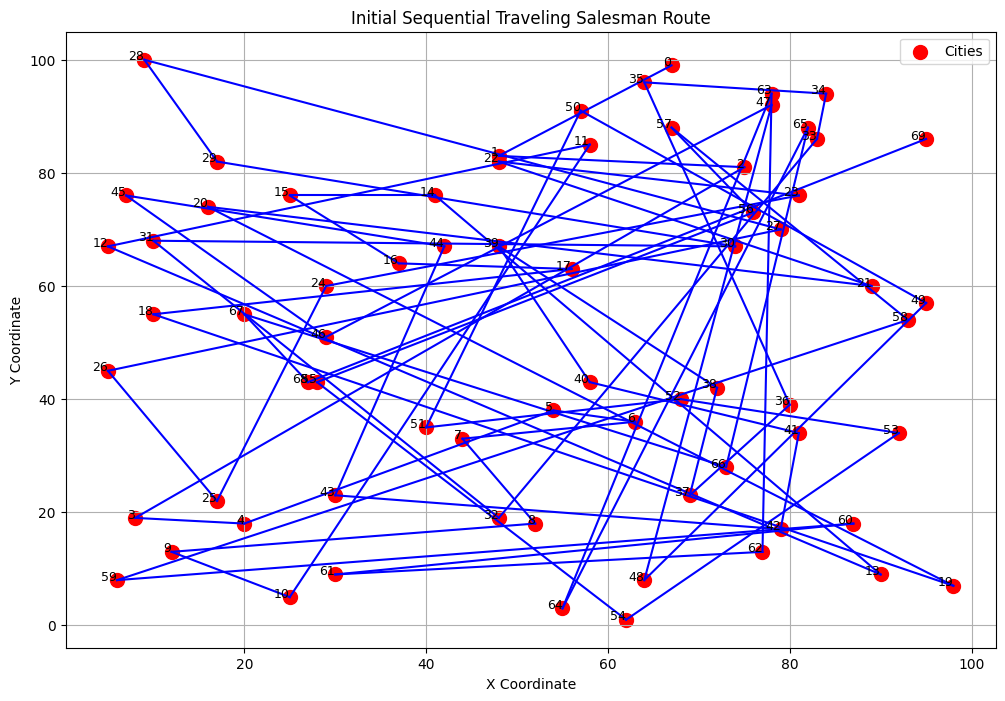

In [38]:
# Coordenadas de las 70 ciudades
cities = np.array([
    [67, 99], [48, 83], [75, 81], [8, 19], [20, 18], [54, 38], [63, 36], [44, 33], [52, 18], [12, 13],
    [25, 5], [58, 85], [5, 67], [90, 9], [41, 76], [25, 76], [37, 64], [56, 63], [10, 55], [98, 7],
    [16, 74], [89, 60], [48, 82], [81, 76], [29, 60], [17, 22], [5, 45], [79, 70], [9, 100], [17, 82],
    [74, 67], [10, 68], [48, 19], [83, 86], [84, 94], [64, 96], [80, 39], [69, 23], [72, 42], [48, 67],
    [58, 43], [81, 34], [79, 17], [30, 23], [42, 67], [7, 76], [29, 51], [78, 92], [64, 8], [95, 57],
    [57, 91], [40, 35], [68, 40], [92, 34], [62, 1], [28, 43], [76, 73], [67, 88], [93, 54], [6, 8],
    [87, 18], [30, 9], [77, 13], [78, 94], [55, 3], [82, 88], [73, 28], [20, 55], [27, 43], [95, 86]
])

# Camino inicial secuencial de 0 a 69
solution = list(range(70))

# Crear un gráfico
plt.figure(figsize=(12, 8))

# Graficar las ciudades
plt.scatter(cities[:, 0], cities[:, 1], color='red', s=100, label='Cities')

# Graficar la ruta secuencial conectando los puntos
for i in range(len(solution) - 1):
    start_city = cities[solution[i]]
    end_city = cities[solution[i + 1]]
    plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], color='blue')

# Añadir etiquetas a las ciudades
for i, city in enumerate(cities):
    plt.text(city[0], city[1], f'{i}', fontsize=9, ha='right')

# Etiquetas y título
plt.title('Initial Sequential Traveling Salesman Route')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()


## Importo archivo de coordenadas y resuelvo el probema con el algoritmo 2-opt

In [33]:
# Definición de la estructura de datos para los puntos
Point = namedtuple("Point", ['x', 'y'])

def download_file(url, local_filename):
    """Descarga un archivo desde una URL y lo guarda localmente."""
    with requests.get(url, stream=True) as response:
        response.raise_for_status()  # Lanza un error si la solicitud falla
        with open(local_filename, 'wb') as file:
            for chunk in response.iter_content(chunk_size=8192):
                file.write(chunk)

# Calcula la distancia euclidiana entre dos puntos
def distance(p1, p2):
    return math.sqrt((p1.x - p2.x) ** 2 + (p1.y - p2.y) ** 2)

# Calcula la distancia total de una ruta
def total_distance(points, tour):
    dist = 0
    for i in range(len(tour)):
        dist += distance(points[tour[i]], points[tour[(i + 1) % len(tour)]])
    return dist

# Realiza un intercambio 2-opt en la ruta
def two_opt_swap(tour, i, k):
    new_tour = tour[:]
    new_tour[i:k+1] = reversed(new_tour[i:k+1])
    return new_tour

# Implementa el algoritmo 2-opt
def two_opt(points, initial_tour):
    tour = initial_tour
    best_distance = total_distance(points, tour)
    improved = True

    while improved:
        improved = False ## Si el nuevo camino no mejora la distancia se siguen procesando opciones hasta encontrar un camino mejor
        for i in range(1, len(tour) - 2):
            for k in range(i + 1, len(tour)):
                if k - i == 1:  # No hacer un swap con sólo dos elementos contiguos
                    continue
                new_tour = two_opt_swap(tour, i, k)
                new_distance = total_distance(points, new_tour)
                if new_distance < best_distance:
                    tour = new_tour
                    best_distance = new_distance
                    improved = True

    return tour

# Procesa los datos de entrada y resuelve el problema
def solve_it(input_data):
    # parse the input
    lines = input_data.split('\n')

    nodeCount = int(lines[0])
    points = []
    for i in range(1, nodeCount+1):
        line = lines[i]
        parts = line.split()
        points.append(Point(float(parts[0]), float(parts[1])))

    # Solución inicial (orden secuencial)
    initial_tour = list(range(len(points)))

    # Mejorar la solución con 2-opt
    optimized_tour = two_opt(points, initial_tour)

    # Me aseguro de que el primer punto sea 0
    if optimized_tour[0] != 0:
        optimized_tour = [0] + [p for p in optimized_tour if p != 0]

    return optimized_tour

if __name__ == '__main__':

    # Descargar el archivo
    download_file(file_url, local_filename)

    # Leer el archivo descargado
    with open(local_filename, 'r') as input_data_file:
        input_data = input_data_file.read()

    # Obtener la solución
    solution = solve_it(input_data)

    # Imprimir la solución
    print(" ".join(map(str, solution)))

0 63 47 34 65 33 69 23 56 27 30 49 21 58 53 36 41 38 52 66 37 6 40 5 32 8 48 62 42 13 60 19 54 64 10 61 9 59 3 25 4 43 51 7 55 68 46 24 67 18 26 31 12 45 28 29 20 15 16 44 17 39 14 1 22 11 50 57 2 35


## Grafico la solución final con las coordenadas y el recorrido final optimizado

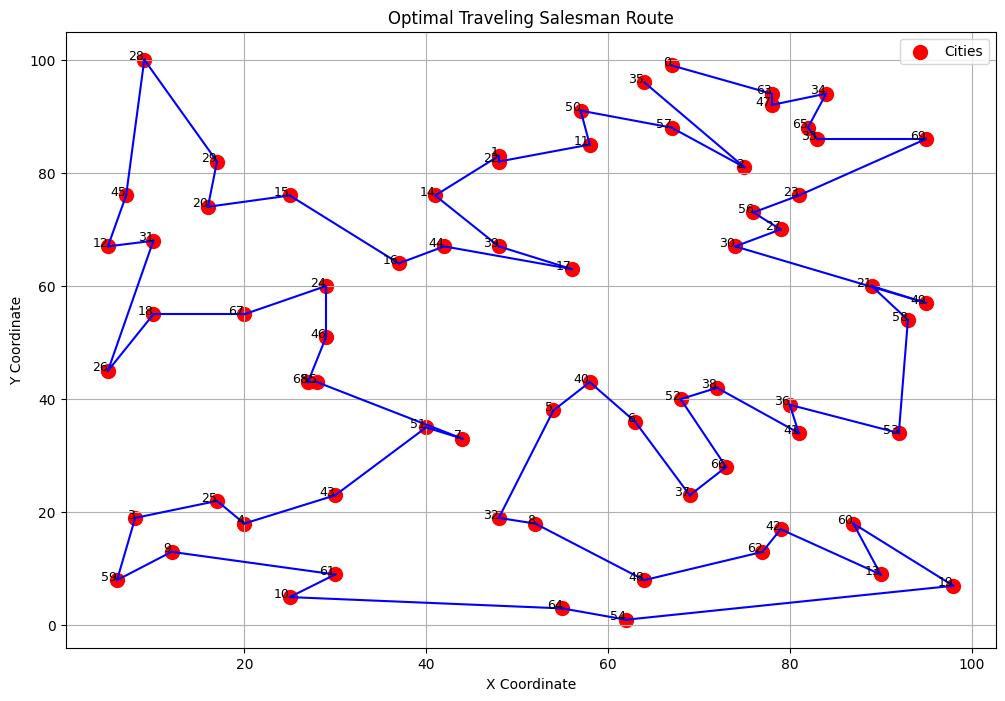

In [35]:
# Camino óptimo encontrado
solution = [0, 63, 47, 34, 65, 33, 69, 23, 56, 27, 30, 49, 21, 58, 53, 36, 41, 38, 52, 66, 37,
            6, 40, 5, 32, 8, 48, 62, 42, 13, 60, 19, 54, 64, 10, 61, 9, 59, 3, 25, 4, 43, 51,
            7, 55, 68, 46, 24, 67, 18, 26, 31, 12, 45, 28, 29, 20, 15, 16, 44, 17, 39, 14, 1,
            22, 11, 50, 57, 2, 35]

# Crear un gráfico
plt.figure(figsize=(12, 8))

# Graficar las ciudades
plt.scatter(cities[:, 0], cities[:, 1], color='red', s=100, label='Cities')

# Graficar la ruta final conectando los puntos
for i in range(len(solution) - 1):
    start_city = cities[solution[i]]
    end_city = cities[solution[i + 1]]
    plt.plot([start_city[0], end_city[0]], [start_city[1], end_city[1]], color='blue')

# Añadir etiquetas a las ciudades
for i, city in enumerate(cities):
    plt.text(city[0], city[1], f'{i}', fontsize=9, ha='right')

# Etiquetas y título
plt.title('Optimal Traveling Salesman Route')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()